<a href="https://colab.research.google.com/github/Harshiz-27/Ml_noobs/blob/main/diabetes_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston house dataset

In [4]:
diabetes_dataset= sklearn.datasets.load_diabetes()

In [5]:
print(diabetes_dataset)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [7]:
#loading the datsets to pandas dataframe
diabetes_dataframe= pd.DataFrame(diabetes_dataset.data , columns= diabetes_dataset.feature_names)

In [8]:
#print first 5 rows of dtatframe
diabetes_dataframe.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
#add target column to dataframe
diabetes_dataframe ['target']= diabetes_dataset.target

In [10]:
diabetes_dataframe.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [11]:
#checking the number of rows and columns in dataframe
diabetes_dataframe.shape

(442, 11)

In [12]:
#checking for missing values
diabetes_dataframe.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [13]:
#statistical measures
diabetes_dataframe.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


Understanding the correlation between various features in dataset
1. Positive Correlation
2. Negative Correlation

In [14]:
correlation= diabetes_dataframe.corr()

<Axes: >

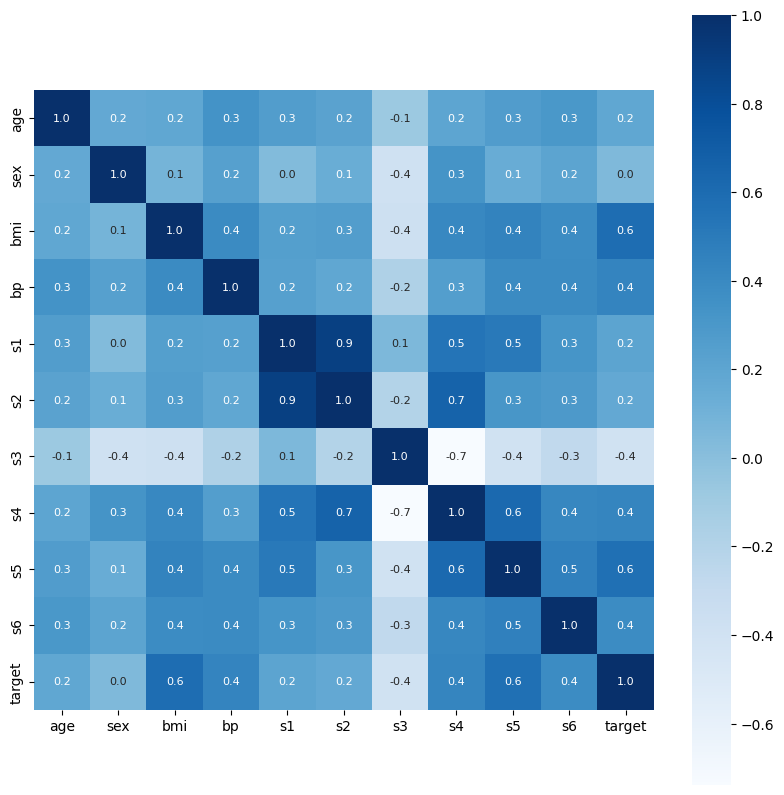

In [15]:
#constructing a heatmapto understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data and target

In [16]:
X= diabetes_dataframe.drop(['target'], axis=1)
Y= diabetes_dataframe['target']

In [17]:
print(X)
print(Y)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

Splitting the data into training data and test data

In [18]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(442, 10) (353, 10) (89, 10)


Model Training

XGBoost Regressor

In [20]:
#loading the model
model=XGBRegressor()

In [21]:
#training the model with X-train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

Predicting on training data

In [22]:
#accuracy for prediction on training data
X_train_prediction= model.predict(X_train)

In [23]:
print(X_train_prediction)

[ 47.965744 275.87878   46.983494 174.95955   59.985703  81.05494
 241.9869   197.05775  136.99403  128.99658  138.05348  159.78181
 116.1801   100.99135  146.86066  100.06323  143.8387    69.091034
 218.78877  107.01588  167.98727  235.96655  109.00632  321.0707
 128.08391   43.053097  72.18786   55.053463 140.99013  282.9609
  58.999695 150.11008  345.98087  123.98892  186.01254  307.94766
 271.96606  189.92863   62.978596  91.08807   71.99481   64.93576
 158.06609   89.99861  185.01553   44.976357 198.93782  205.88783
  61.00092  139.06784  295.9632   281.02393  121.99923   94.935974
  40.02093  127.00229  145.01137  107.974556 185.03137   53.222412
 132.05135  100.99293  263.01324   94.02138  294.9965   258.72443
 231.99785  124.006035  76.96036  102.03021   96.00648   83.065
 262.99915   71.08762  246.06815   66.22675  114.99072  221.97829
  92.97512  129.06157  128.1102   163.22987   98.98616   91.99184
 178.99318  140.07556   93.9456    96.95009  173.99873   60.995968
 201.98564

In [24]:
# R squared error
score_1= metrics.r2_score(Y_train, X_train_prediction)

# Mean Absolute Error
score_2= metrics.mean_absolute_error(Y_train, X_train_prediction)

print("R squared error: ", score_1)
print("Mean Absolute Error : ",score_2)

R squared error:  0.9999988370024301
Mean Absolute Error :  0.055394850776823656


Visualise the actual level and predicted level

Prediction on Test Data

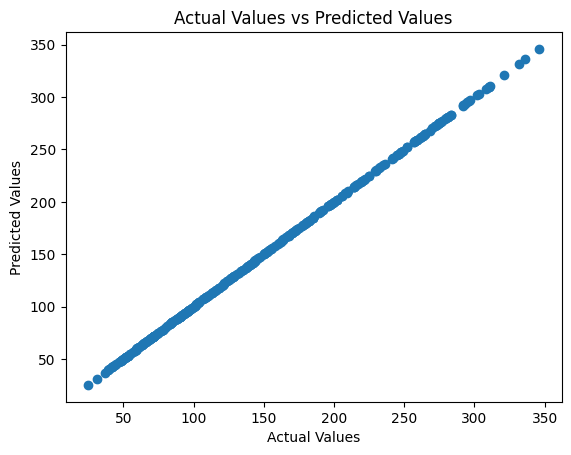

In [29]:
plt.scatter(Y_train, X_train_prediction)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Predicted Values")
plt.show()

In [25]:
#accuracy for prediction on test data
X_test_prediction= model.predict(X_test)

In [26]:
print(X_test_prediction)

[133.9632   186.61066  101.877785  59.328842 301.52563  211.56068
  61.861706  98.47566  113.18798  117.733765 199.44745  174.72
 132.96904  185.82692  331.96936   79.44704  163.13951  152.95949
 111.54274   70.75407  104.2397   168.21265  132.9199   163.03018
 107.32195  237.23825  273.07568  108.616234  59.281563 250.0499
 190.74187   66.71807   68.15554  111.17781  254.0642   198.11815
 172.56242  206.99666   90.31281  215.8339   101.37341   83.43118
 172.09735  143.51605  181.00133  119.168175 189.43762  308.47336
  52.626324 182.72055  274.0866   128.3693    85.11047  130.47
 189.9576    59.36051   92.873955  61.39741  147.31125  162.87624
 117.28076  120.3187    90.75806  267.1089    80.96111  148.53226
 135.73654  222.20566   74.303     79.64121  183.10881  190.27855
 181.82024   76.740234 155.72621  109.78586   48.818398  60.032604
 231.94763   77.882324 158.21893  102.47738  126.50537  259.03732
 260.9012   149.13919  288.01898  152.1784   145.49722 ]


In [28]:
# R squared error
score_1= metrics.r2_score(Y_test, X_test_prediction)

# Mean Absolute Error
score_2= metrics.mean_absolute_error(Y_test, X_test_prediction)

print("R squared error: ", score_1)
print("Mean Absolute Error : ",score_2)

R squared error:  0.11813271979779438
Mean Absolute Error :  56.44551480754038


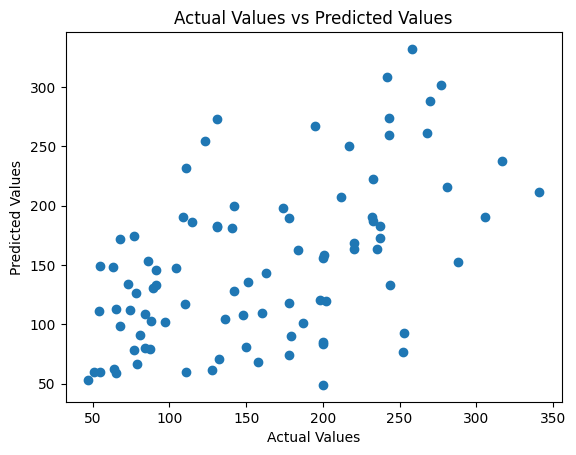

In [31]:
plt.scatter(Y_test, X_test_prediction)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Predicted Values")
plt.show()